Please enter the product details : pixel
https://www.flipkart.com/search?q=pixel
please tell whether the product is phone or other product 
 p:Phone 
 o:other items 
 p
Here are the top 5 results for your search: 

1. Google Pixel 3 XL (Clearly White, 128 GB)
 Current price: ₹73,999
 Original price: ₹92,000
 Discount: 19% off




2. Google Pixel 3 XL (Just Black, 64 GB)
 Current price: ₹61,999
 Original price: ₹83,000
 Discount: 25% off




3. Google Pixel 3 XL (Clearly White, 64 GB)
 Current price: ₹61,999
 Original price: ₹83,000
 Discount: 25% off




4. Google Pixel 3 (Clearly White, 128 GB)
 Current price: ₹65,999
 Original price: ₹80,000
 Discount: 17% off




5. Google Pixel 3 XL (Not Pink, 64 GB)
 Current price: ₹61,999
 Original price: ₹83,000
 Discount: 25% off




please enter the selection made options 1 or 2 or 3 or 4 or 5 : 1
Your selection is : 
Google Pixel 3 XL (Clearly White, 128 GB)


<IPython.core.display.Javascript object>


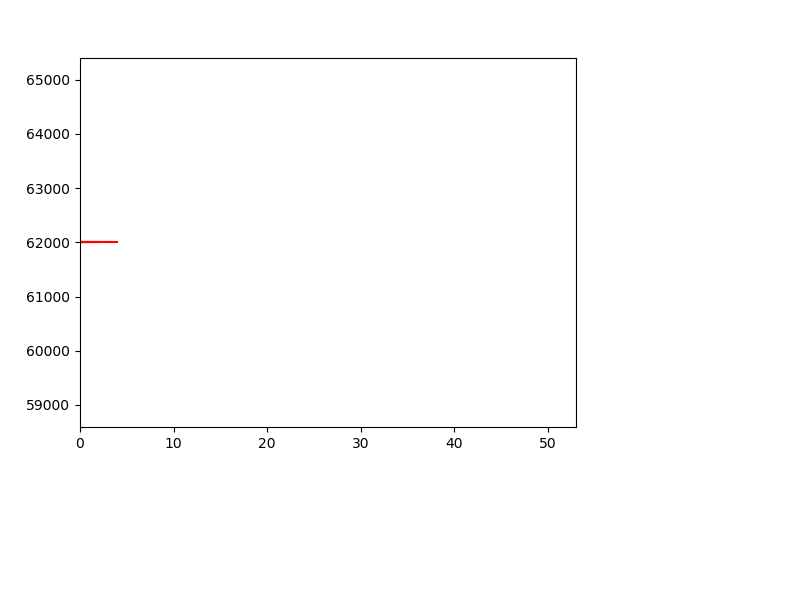

In [ ]:
def main():
    import bs4 
    import requests
    import urllib 
    from bs4 import BeautifulSoup
    from selenium import webdriver
    import matplotlib.pyplot as pyplot
    import matplotlib.animation as animation 
    import time
    import matplotlib.pyplot as plt


#--------------------------------------------- url string formation -------------------------------------------
    chrome_path = r"D:\software\chromedriver_win32\chromedriver.exe"
    driver = webdriver.Chrome(chrome_path)


    url = 'https://www.flipkart.com/search?q='

    inp = input("Please enter the product details : ")
    inp = list(inp.split(" "))

    for i in range (len(inp)-1):
        url = url + inp[i] + '+'
    url = url + inp[-1]
    print(url)

    driver.get(url)

    typedata = input("please tell whether the product is phone or other product \n p:Phone \n o:other items \n ")
#-------------------------------------- taking selection --------------------------------------------

#---------------------------------------if product is mobile ------------------------------------------
    if(typedata == 'p'):
        r = requests.get(url)
        soup = bs4.BeautifulSoup(r.text,"xml")
        name = soup.find_all('div',{'class':'_3wU53n'})[:5]
        nowprice = soup.find_all('div',{'class':'_1vC4OE _2rQ-NK'})[:5]
        oriprice = soup.find_all('div',{'class':'_3auQ3N _2GcJzG'})[:5]
        discount = soup.find_all('div',{'class':'VGWI6T'})[:5]
        f_name = []
        f_nowprice = []
        f_oriprice = []
        f_discount = []
        print("Here are the top 5 results for your search: \n")
        for i in range(len(nowprice)):
            f_name.append(name[i].text)
            f_nowprice.append(nowprice[i].text)
            f_oriprice.append(oriprice[i].text)
            f_discount.append(discount[i].text)
            print(str(i+1) + ". " +name[i].text +"\n Current price: "+ nowprice[i].text + "\n Original price: " + oriprice[i].text + "\n Discount: " + discount[i].text)
            print("\n")
            print("\n")
        selection = input("please enter the selection made options 1 or 2 or 3 or 4 or 5 : ")
        target = int(selection) - 1
        print("Your selection is : \n"+f_name[target])
        temp = f_nowprice[target].split('₹')[1]
        targetprice = int(''.join(temp.split(',')))
        if(f_discount[target][0] == '₹'):
            temp = f_discount[target].split('₹')[1]
            temp = (temp.split(' ')[0])
            targetdiscount = int(''.join(temp.split(',')))
        else:
            temp = (f_discount[target].split('%')[0])
            targetdiscount = int(''.join(temp.split(',')))
    
#---------------------------------------------------if product is other than mobile ----------------------------------------
    if(typedata == 'o'):
        r = requests.get(url)
        soup = bs4.BeautifulSoup(r.text,"xml")
        name = soup.find_all('a',{'class':'_2cLu-l'})[:5]
        nowprice = soup.find_all('div',{'class':'_1vC4OE'})[:5]
        oriprice = soup.find_all('div',{'class':'_3auQ3N'})[:5]
        discount = soup.find_all('div',{'class':'VGWI6T'})[:5]
        f_name = []
        f_nowprice = []
        f_oriprice = []
        f_discount = []
        print("Here are the top 5 results for your search: \n")
        for i in range(len(nowprice)):
            f_name.append(name[i].text)
            f_nowprice.append(nowprice[i].text)
            f_oriprice.append(oriprice[i].text)
            f_discount.append(discount[i].text)
            print(str(i+1) + ". " +name[i].text +"\n Current price: "+ nowprice[i].text + "\n Original price: " + oriprice[i].text + "\n Discount: " + discount[i].text)
            print("\n")
            print("\n")
        selection = int(input("please enter the selection made options 1 or 2 or 3 or 4 or 5 : "))
        target = selection - 1
        print("Your selection is : \n"+f_name[target])
        targetprice = int(f_nowprice[target].split('₹')[1])
        if(f_discount[target][0] == '₹'):
            temp = f_discount[target].split('₹')[1]
            targetdiscount = int(temp.split(' ')[0])
        else:
            targetdiscount = int(f_discount[target].split('%')[0])
        print (driver.current_url)
    
#------------------------------- plotting here - -----------------------------------------------
    %matplotlib notebook
    plt.rcParams['animation.html'] = 'jshtml'
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.show()
    
    i = 0
    
    x, y = [], []
    if(typedata == 'p'):
        newurl = driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[2]/div/div[1]/div[2]/div['+str(target+2)+']/div/div/div/a').get_attribute('href')
    if(typedata == 'o'):
        newurl = driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[2]/div/div/div[2]/div[2]/div/div['+str(target+1)+']/div/div/a[1]').get_attribute('href')
    while(True):
        driver.get(newurl)
        if(typedata == 'p'):
            final_price = driver.find_element_by_css_selector('#container > div > div.t-0M7P._3GgMx1._2doH3V > div._3e7xtJ > div > div._1HmYoV.hCUpcT > div._1HmYoV._35HD7C.col-8-12 > div:nth-child(2) > div > div._3iZgFn > div._2i1QSc > div > div._1vC4OE._3qQ9m1').text
        if(typedata == 'o'):
            final_price = driver.find_element_by_css_selector('#container > div > div.t-0M7P._3GgMx1._2doH3V > div._3e7xtJ > div > div._1HmYoV.hCUpcT > div._1HmYoV._35HD7C.col-8-12 > div:nth-child(2) > div > div._3iZgFn._9Z7kX3 > div._2i1QSc > div > div._1vC4OE._3qQ9m1').text
        final_price = ''.join(final_price.split(','))
        final_price = int(''.join(final_price.split('₹')))
        
        x.append(i)
        y.append(final_price)
    
        ax.plot(x, y, color='r')
        
        
        fig.canvas.draw()
    
        ax.set_xlim(left=max(0, i-50), right=i+50)
        
        time.sleep(60)
        i += 1
    driver.quit()
if __name__ == "__main__":
    try:
          main()
    except KeyboardInterrupt:
          pass

[]